In [16]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [60]:
def PR_wave(data1, ind = 0):
    time_P1 = np.arange(0, data1[8]/2, 10)
    #print(time_P1)
    amplitude_P1 = np.zeros(len(time_P1))
    #print(amplitude_P1)
    time_P2 = np.arange(data1[8]/2, data1[8], 10)
    #print(time_P2)
    if data1[165+ind] < 1.0:
        amplitude1 = np.zeros(len(time_P2))
    else:
        amplitude1 = np.arange(0, data1[165+ind], 2*data1[165+ind]/len(time_P2))
    amplitude2 = amplitude1[::-1]
    amplitude_P2 = np.concatenate((amplitude1, amplitude2[1:], [0]), axis = 0)

    if data1[5] > data1[8]:
        PR_diff = data1[5]-data1[8]
    else:
        PR_diff = data1[8]-data1[5]
    time_PR = np.arange(data1[8], data1[5], 10)
    time = np.concatenate((time_P1, time_P2, time_PR), axis = 0)
    amplitude_PR = np.zeros(int(PR_diff/10))
    amplitude = np.concatenate((amplitude_P1, amplitude_P2, amplitude_PR), axis = 0)
    #print(len(time), len(amplitude))
    if len(time) > len(amplitude):
        diff = len(time) - len(amplitude)
        amplitude = np.concatenate((amplitude, amplitude[-diff:]), axis = 0)
    elif len(time) < len(amplitude):
        diff = len(amplitude) - len(time)
        amplitude = amplitude[:len(time)]
        if len(time) == 0:
            amplitude = []
    #print(len(time), len(amplitude))
    return time, amplitude

In [61]:
time_r, amplitude_r = PR_wave(data1)
print(time_r, amplitude_r)

[  0.   10.   20.   30.   40.   45.5  55.5  65.5  75.5  85.5  91.  101.
 111.  121.  131.  141.  151.  161. ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


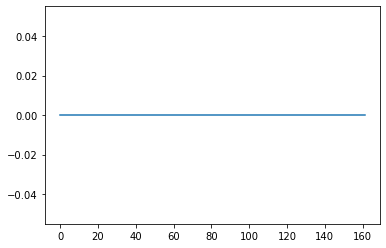

In [62]:
plt.plot(time_r, amplitude_r)

In [65]:
def QRS_wave(data1, ind = 0):
    time_Q = np.arange(data1[5], data1[5] + data1[4]/3, 10)
    if data1[160+ind] == 0.0:
        amplitude_Q = np.zeros(len(time_Q))
    else:
        amplitude1 = np.arange(0, data1[160+ind], 2*data1[160+ind]/len(time_Q))
        amplitude2 = amplitude1[::-1]
        amplitude_Q = np.concatenate((amplitude1, amplitude2[1:], [0]), axis = 0)
    time_R = np.arange(data1[5] + data1[4]/3, data1[5] + 2*data1[4]/3, 10)
    #print(time_R)
    time_S1 = np.arange(data1[5] + 2*data1[4]/3, data1[5] + 2*data1[4]/3 + data1[4]/6 , 10)
    #print(time_S1)
    time_RS = np.concatenate((time_R, time_S1), axis = 0)
    #print(time_RS)
    time_1 = np.arange(data1[5] + data1[4]/3, data1[5] + 2*data1[4]/3 + data1[4]/6 , 10)
    #print(time_1)
    if data1[161+ind] == 0: amplitude1 = [0.0, 0.0]
    else:
        amplitude1 = np.arange(0, data1[161+ind], data1[161+ind]/2)
        if data1[161+ind] == 0: amplitude2 = [0.0, 0.0]
        else:
            amplitude2 = np.arange(data1[162+ind], data1[161+ind], 2*data1[161+ind]/3)
    amplitude_RS = np.concatenate((amplitude1, [data1[161+ind]], amplitude1[::-1], [-1]), axis = 0)
    #print(amplitude_RS)
    time_1 = np.arange(data1[5] + 2*data1[4]/3 + data1[4]/6, data1[5] + data1[4], 10)
    time_S = np.concatenate((time_1, [data1[5] + data1[4]]))
    #print(data1[162+ind], -data1[162+ind]/len(time_1))
    if data1[162+ind] == 0: amplitude1 = [0.0, 0.0]
    else:
        amplitude1 = np.arange(data1[162+ind], 0.0, -data1[162+ind]/len(time_1))
    #print("Amp",amplitude1)
    amplitude_S = np.concatenate((amplitude1, [0.0]))
    time = np.concatenate((time_Q, time_RS, time_S))
    #print(time)
    amplitude = np.concatenate((amplitude_Q, amplitude_RS, amplitude_S))
    amplitude
    #print("Final", amplitude)
    if len(time) > len(amplitude):
        diff = len(time) - len(amplitude)
        amplitude = np.concatenate((amplitude, amplitude[-diff:]), axis = 0)
    elif len(time) < len(amplitude):
        diff = len(amplitude) - len(time)
        time = np.concatenate((time, time[-diff:]), axis = 0)
    #print(len(time), len(amplitude))
    return time, amplitude

In [66]:
time, amplitude = QRS_wave(data1)

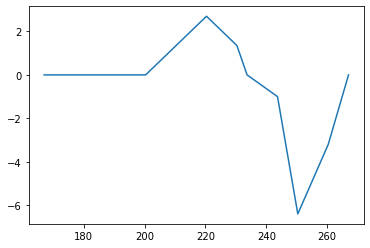

In [67]:
plt.plot(time, amplitude)

In [68]:
def ST_wave(data1, ind = 0):
    time_ST1 = np.arange(data1[5] + data1[4], data1[5] + data1[6] - data1[7], 10)
    #print(time_ST1)
    amplitude_ST1 = np.zeros(len(time_ST1))
    #print(amplitude_ST1)
    time_T = np.arange(data1[5] + data1[6] - data1[7], data1[5] + data1[6] - data1[7] + data1[7]/2, 10)
    #print(time_T)
    if data1[166+ind] < 1.0:
        amplitude1 = np.zeros(len(time_T))
    else:
        amplitude1 = np.arange(0, data1[166+ind], 2*data1[166+ind]/len(time_T))
    amplitude2 = amplitude1[::-1]
    amplitude_T = np.concatenate((amplitude1, amplitude2[1:]), axis = 0)
    #print(amplitude_T)
    time_T1 = np.arange(data1[5] + data1[6] - data1[7] + data1[7]/2, data1[5] + data1[6], 10)
    #print(time_T1)
    amplitude_T1 = np.zeros(len(time_T1))
    time_ST = np.concatenate((time_ST1, time_T, time_T1))
    amplitude_ST = np.concatenate((amplitude_ST1, amplitude_T, amplitude_T1))
    if len(time_ST) > len(amplitude_ST):
        diff = len(time_ST) - len(amplitude_ST)
        amplitude_ST = np.concatenate((amplitude_ST, amplitude_ST[-diff:]), axis = 0)
    elif len(time_ST) < len(amplitude_ST):
        diff = len(amplitude_ST) - len(time_ST)
        time_ST = np.concatenate((time_ST, time_ST[-diff:]), axis = 0)
    # print(len(time_ST), len(amplitude_ST))
    return time_ST, amplitude_ST

In [69]:
time_p, amplitude_p = PR_wave(data1)
time_q, amplitude_q = QRS_wave(data1)
time_s, amplitude_s = ST_wave(data1)

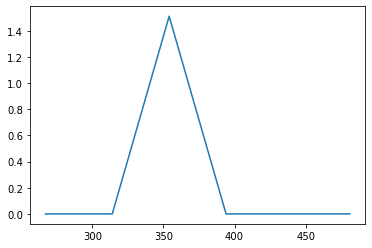

In [70]:
plt.plot(time_s, amplitude_s)

Text(0, 0.5, 'Amplitude')

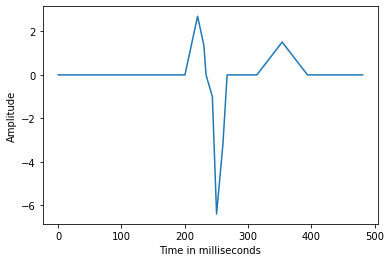

In [71]:
plt.plot(np.concatenate((time_p, time_q, time_s)), np.concatenate((amplitude_p, amplitude_q, amplitude_s)))
plt.xlabel("Time in milliseconds")
plt.ylabel("Amplitude")

In [72]:
def plot_wave_1(data1, ind = 0):
    time_p, amplitude_p = PR_wave(data1, ind)
    time_q, amplitude_q = QRS_wave(data1, ind)
    time_s, amplitude_s = ST_wave(data1, ind)
    x1 = np.concatenate((time_p, time_q, time_s))
    y1 = np.concatenate((amplitude_p, amplitude_q, amplitude_s))
    #print(y1)
    x2 = np.concatenate((data1[6] + data1[7] + time_p, data1[6] + data1[7] + time_q, data1[6] + data1[7] + time_s))
    return np.concatenate((x1, x2)), np.concatenate((y1, y1))

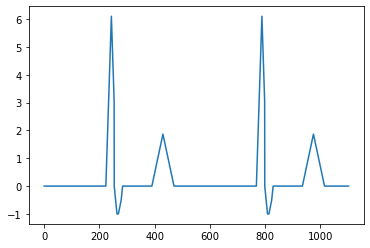

In [435]:
time1, amplitude1 = plot_wave_1(data1)
plt.plot(time1, amplitude1)

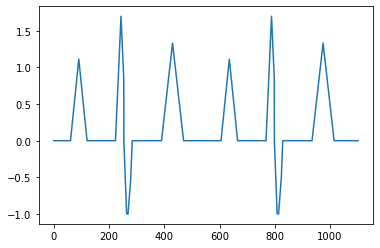

In [436]:
time2, amplitude2 = plot_wave_1(data1, 10)
plt.plot(time2, amplitude2)

In [437]:
def plot_fig(data, number):
    fig, ax = plt.subplots(
        3, 4,
        sharex=True, 
        sharey=True
        #figsize=(0.7*seconds*columns, 1.1*leads/columns)
        )
    fig.subplots_adjust(
        hspace = 0, 
        wspace = -0.05,
        left   = 0,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0,  # the bottom of the subplots of the figure
        top    = 0.98
        )
    i =0
    j =0
    k=0
    labels = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    while i < 12:
        if k == 3:
            k=0
            j+=1
        time_1, amplitude_1 = plot_wave_1(data, i*10)
        ax[k,j].plot(time_1, amplitude_1)
        ax[k,j].annotate(labels[i], (0,0.85))
        # remove the x and y ticks
        ax[k,j].set_xticks([])
        ax[k,j].set_yticks([])
        i+=1
        k+=1
    plt.savefig('plots/plot' + str(number) + '.png')

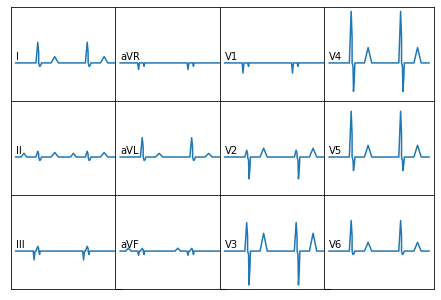

In [438]:
plot_fig(data1, 1)

In [2]:
df = pd.read_csv('arrhythmia.data', sep=",", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [3]:
df1 = df.replace('?', np.nan)
df1

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [441]:
X = df1.iloc[:].values
# For calculating mean we used Simple Imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X

array([[ 75. ,   0. , 190. , ...,  23.3,  49.4,   8. ],
       [ 56. ,   1. , 165. , ...,  20.4,  38.8,   6. ],
       [ 54. ,   0. , 172. , ...,  12.3,  49. ,  10. ],
       ...,
       [ 36. ,   0. , 166. , ..., -44.2, -33.2,   2. ],
       [ 32. ,   1. , 155. , ...,  25. ,  46.6,   1. ],
       [ 78. ,   1. , 160. , ...,  21.3,  32.8,   1. ]])

In [442]:
df_fill = pd.DataFrame(X)
df_fill

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0


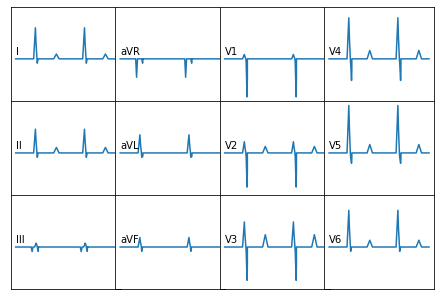

In [443]:
plot_fig(df_fill.loc[1, :], i)